# Adaptive Thresholding - Molude_3.1

In [18]:
# import library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Drive mount
from google.colab import files
uploaded = files.upload()

Saving berry-1.jpg to berry-1.jpg


**Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)**

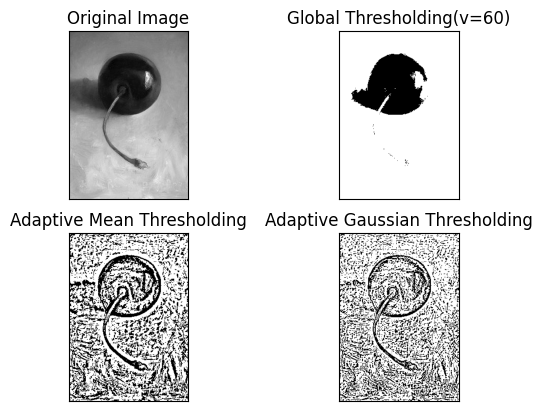

In [3]:
# loading image
image_path = '/content/berry-1.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # loaded in grayscale (channel reducing/)

ret, th1 = cv.threshold(img,60,255, cv.THRESH_BINARY) # fun1
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Original Image','Global Thresholding(v=60)',
          'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in range(4):
  plt.subplot(2,2, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

### Outplut Analysis

1. Adaptive Gaussain best seperate the subject from background
2. Global Thresholding : subject (img) melt with background, not properly seperated, our objective is to seperate seperate subject from its background properly. Since its global thresholding here is fail to seperate properly
3. Adaptive : its comperately better for subjet seperation consideration subject shape. Both is good, in case of mean it thresholding carries some background noise and gaussian comperative works better!

**Grayscale Conversion**
 Channel Reducing
- One Layer
- Convert all image pixel into a single layer & make the pixel valus within a certain range of intensity (0-255)
- We can seperate a image dependingly only two values (black & white)
- When each channel pixel differ, then grayscal make it optimization


# Otsu's Thresholding

image.png

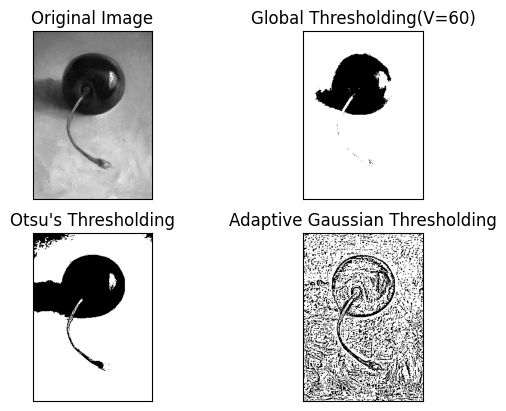

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image_path = image_path = '/content/berry-1.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Appy global Thresholing
ret1, th1 = cv.threshold(img, 60, 255, cv.THRESH_BINARY)

# Apply Otsu Thresholding
ret2, th2 = cv.threshold(img,60, 255, cv.THRESH_BINARY + cv.THRESH_OTSU )

# # Apply adaptive mean thresholding
# th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply adaptive Gaussian thresholding
th4 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Plot the results
titles = ['Original Image','Global Thresholding(V=60)', "Otsu's Thresholding", 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th4]

for i in range(4):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()


# Practice Session

### Test 1

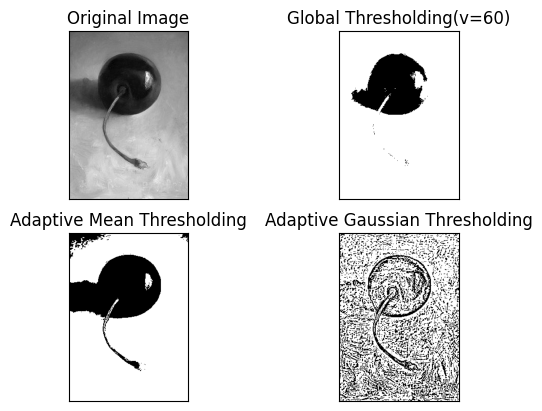

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Loading images (must be grayscale)
image_path = image_path = '/content/berry-1.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply global thresholding
ret1, th1 = cv.threshold(img, 60, 255, cv.THRESH_BINARY)

# Apply adaptive thresholding with different parameters
block_size = 25 # Larger block
c_value = 9     # adjusted constant

th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, c_value)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, c_value)

# Titles
titles = ['Original Image','Global Thresholding(v=60)', 'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']
imges = [img, th1, th2, th3]

# Display the images
for i in range(4):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()


### Test 2 : Try with different Combinnation (block size & constant value)

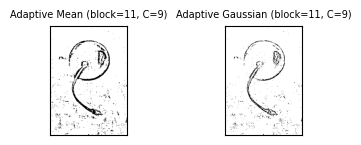

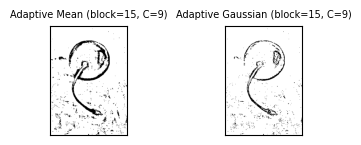

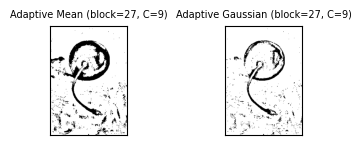

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

# Funcational approach to apply apaptive thresholding with given parameters
def apply_thresholding(img, block_size, C_value):
  th_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C_value)
  th_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, C_value)

  return th_mean, th_gaussian

# Experiment with different block sizes and C values
block_sizes = [11, 15, 27]   # odd numbers
C_values = [2, 5, 9]         # odd & even numbers

# Display results
for block_size in block_sizes:
    for c_value in C_values:
        th_mean, th_gaussian = apply_thresholding(img, block_size, c_value)
        titles = [f'Adaptive Mean (block={block_size}, C={c_value})', f'Adaptive Gaussian (block={block_size}, C={c_value})']
        images = [th_mean, th_gaussian]

    for i in range(2):
      plt.subplot(len(block_sizes), len(C_values), i +1 )
      plt.imshow(images[i], 'gray')
      plt.title(titles[i], fontsize=7)
      plt.xticks([]), plt.yticks([])

    plt.show()

### Test 3: Adjust Grid - its returned One

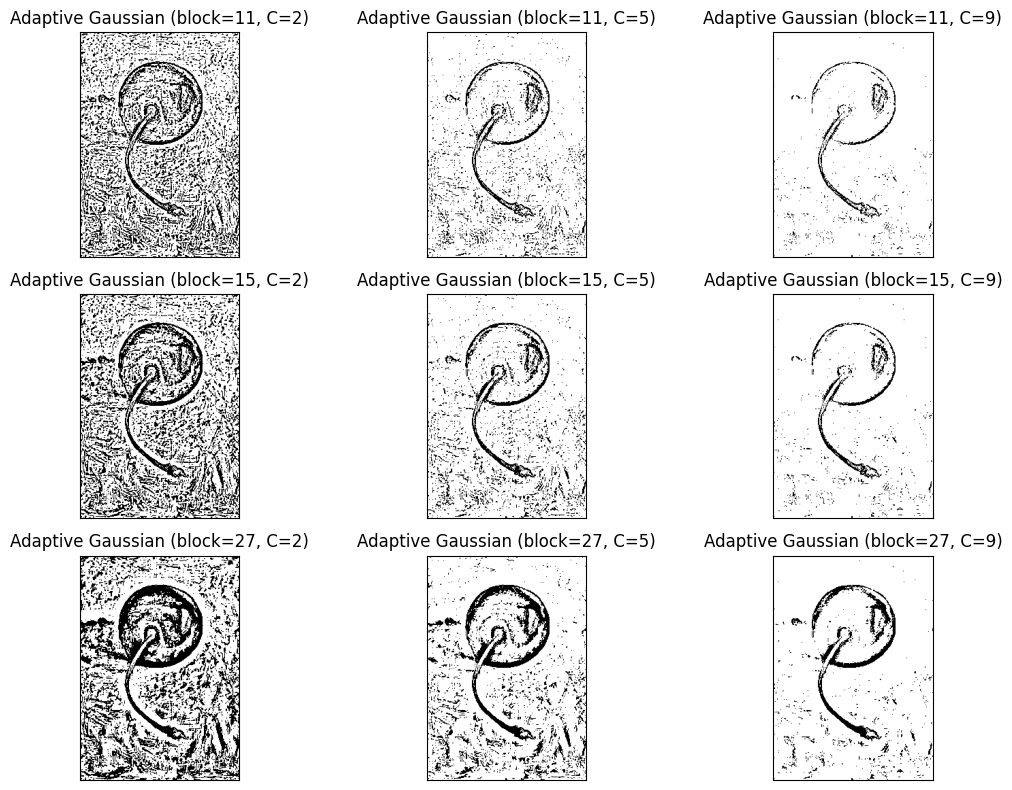

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = image_path = '/content/berry-1.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Function to apply adaptive thresholding with given parameters
def apply_thresholding(img, block_size, C_value):
    th_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C_value)
    th_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, C_value)
    return th_mean, th_gaussian

# Experiment with different block sizes and C values
block_sizes = [11, 15, 27]   # odd numbers
C_values = [2, 5, 9]         # odd & even numbers

# Create a figure with a 3x2 grid
fig, axes = plt.subplots(len(block_sizes), len(C_values), figsize=(12, 8))

# Display results
for i, block_size in enumerate(block_sizes):
    for j, c_value in enumerate(C_values):
        th_mean, th_gaussian = apply_thresholding(img, block_size, c_value)
        titles = [f'Adaptive Mean (block={block_size}, C={c_value})', f'Adaptive Gaussian (block={block_size}, C={c_value})']
        images = [th_mean, th_gaussian]

        for k in range(2):
            ax = axes[i, j]
            ax.imshow(images[k], 'gray')
            ax.set_title(titles[k])
            ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()


### Test 3: Adjust Grid - its returned Two (Mean & Gaussian)

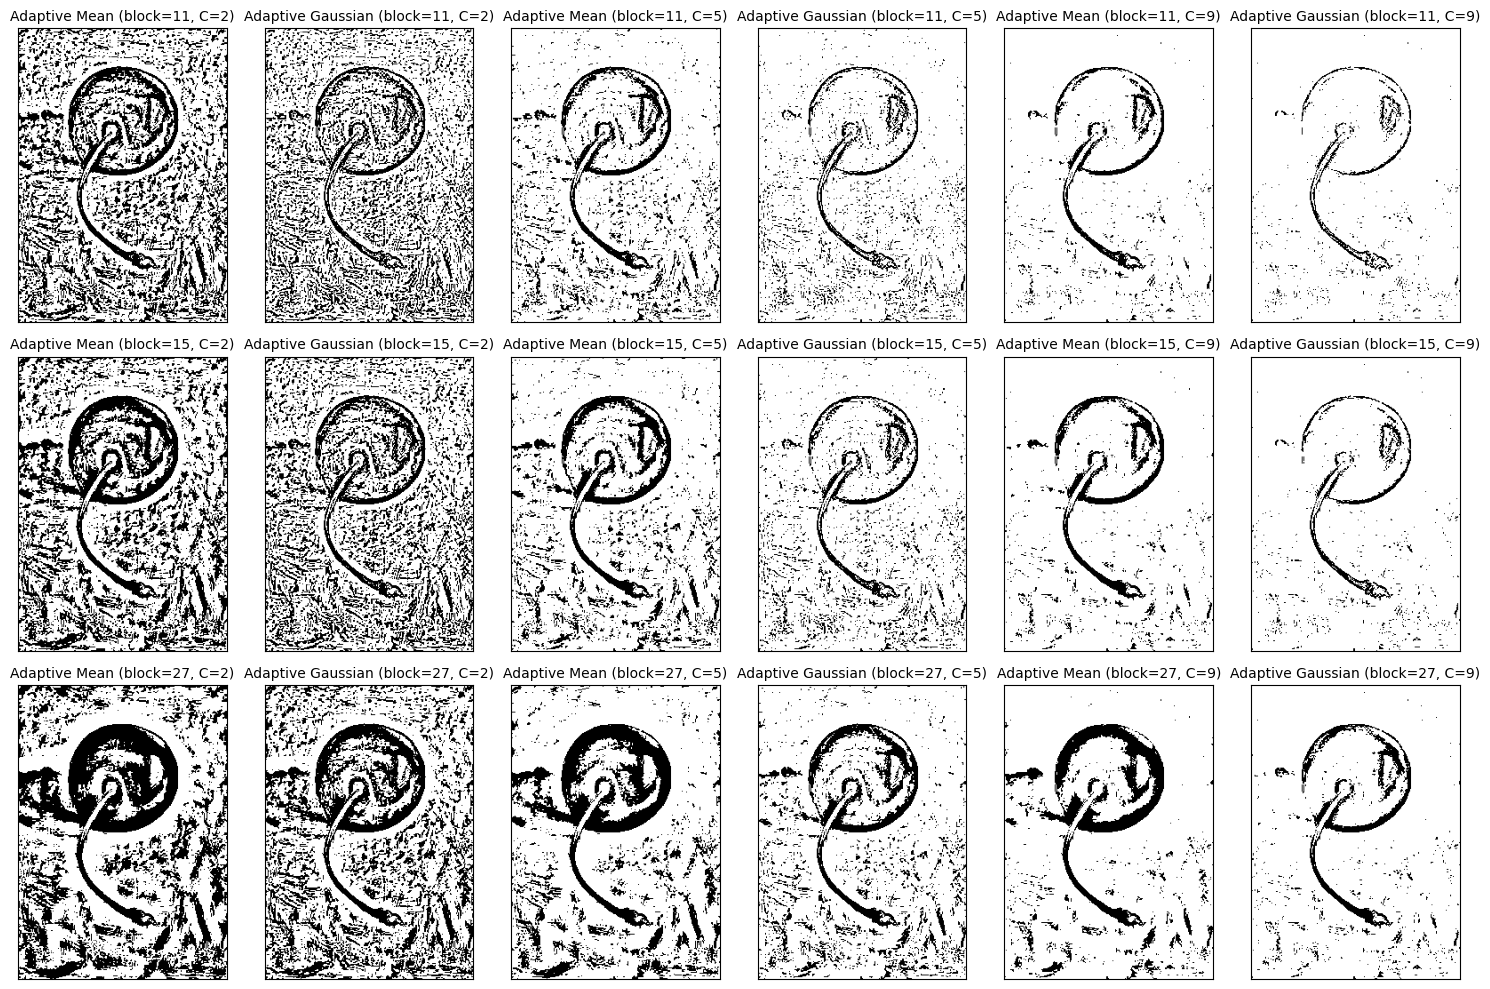

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = image_path = '/content/berry-1.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Function to apply adaptive thresholding with given parameters
def apply_thresholding(img, block_size, C_value):
    th_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C_value)
    th_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, C_value)
    return th_mean, th_gaussian

# Experiment with different block sizes and C values
block_sizes = [11, 15, 27]   # odd numbers
C_values = [2, 5, 9]         # odd & even numbers

# Create a figure with a 3x2 grid for each method
fig, axes = plt.subplots(len(block_sizes), len(C_values) * 2, figsize=(15, 10))

# Display results
for i, block_size in enumerate(block_sizes):
    for j, c_value in enumerate(C_values):
        th_mean, th_gaussian = apply_thresholding(img, block_size, c_value)
        titles = [f'Adaptive Mean (block={block_size}, C={c_value})', f'Adaptive Gaussian (block={block_size}, C={c_value})']
        images = [th_mean, th_gaussian]

        for k in range(2):
            ax = axes[i, j * 2 + k]
            ax.imshow(images[k], 'gray')
            ax.set_title(titles[k],fontsize=10)  # Adjust the fontsize here
            ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()


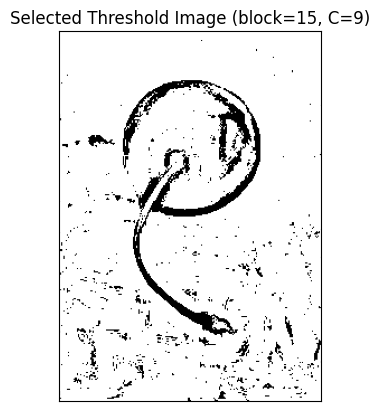

In [22]:
import cv2 as cv
import matplotlib.pyplot as plt

# Function to apply adaptive thresholding with given parameters
def apply_thresholding(img, block_size, C_value):
    th_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, C_value)
    th_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, C_value)
    return th_mean, th_gaussian

# Example parameters
block_size = 15  # Replace with the desired block size
C_value = 9     # Replace with the desired C value

# Apply thresholding
threshold_image_mean, threshold_image_gaussian = apply_thresholding(img, block_size, C_value)

# Save the desired thresholded image to a variable
threshold_image = threshold_image_mean  # or threshold_image_gaussian

# Display the selected thresholded image
plt.imshow(threshold_image, 'gray')
plt.title(f'Selected Threshold Image (block={block_size}, C={C_value})')
plt.xticks([]), plt.yticks([])
plt.show()

# Now 'selected_threshold_image' holds your thresholded image which you can compare with your ground truth


### Test 4: Evaluation

In [23]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the image in grayscale- Ground thurth image
image_path = image_path = '/content/berry-1.jpg'
ground_truth = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

def evaluate_thresholding(threshold_image, ground_truth):    # threshold_image; ground_truth image = img
    # Flatten the images
    thresholded_img_flat = threshold_image.flatten()
    ground_truth_flat = ground_truth.flatten()

    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(ground_truth_flat, thresholded_img_flat, average='macro') # average='binary' by default, which is not suitable for multiclass targets.
    recall = recall_score(ground_truth_flat, thresholded_img_flat, average='macro')
    f1 = f1_score(ground_truth_flat, thresholded_img_flat, average='macro')

    # Calculate SSIM
    ssim_index = ssim(threshold_image, ground_truth)

    return precision, recall, f1, ssim_index

# Example usage
precision, recall, f1, ssim_index = evaluate_thresholding(th_mean, ground_truth)
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, SSIM: {ssim_index}")


Precision: 2.938188851030652e-07, Recall: 0.003952569169960474, F1 Score: 5.875940907072523e-07, SSIM: 0.43279811774450877
